In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Reading data train and test
datatrain = pd.read_csv('/content/train - train.csv')
datatest = pd.read_csv('/content/test - test.csv')


In [ ]:
#preprocessing on datatrain
datatrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [ ]:
datatest.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
datatrain.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# preprocess on datatest
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
datatest.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
datatest.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [ ]:

datatrain.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:

datatest.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

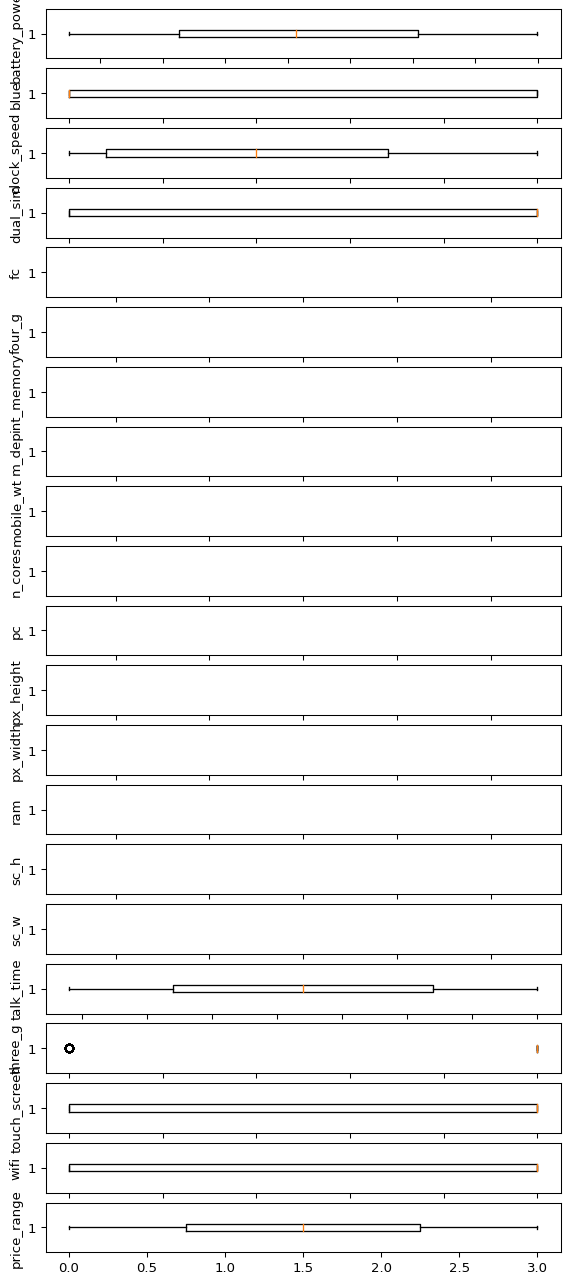

In [ ]:
# Box Plots
fig, axs = plt.subplots(21,1,dpi=95, figsize=(7,17))
i = 0
for col in datatrain.columns[:21]:
    axs[i].boxplot(datatrain[col],vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [ ]:
#create a function to find outliers using IQR

def find_outliers_IQR(datatrain):

   q1=datatrain.quantile(0.25)

   q3=datatrain.quantile(0.75)

   IQR=q3-q1

   outliers = datatrain[((datatrain<(q1-1.5*IQR)) | (datatrain>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers_IQR(datatrain["fc"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))



number of outliers: 18
max outlier value: 19.0
min outlier value: 17.0


In [ ]:
outliers = find_outliers_IQR(datatrain["px_height"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))



number of outliers: 2
max outlier value: 1960.0
min outlier value: 1949.0


In [ ]:
outliers = find_outliers_IQR(datatrain["three_g"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))


number of outliers: 477
max outlier value: 0
min outlier value: 0


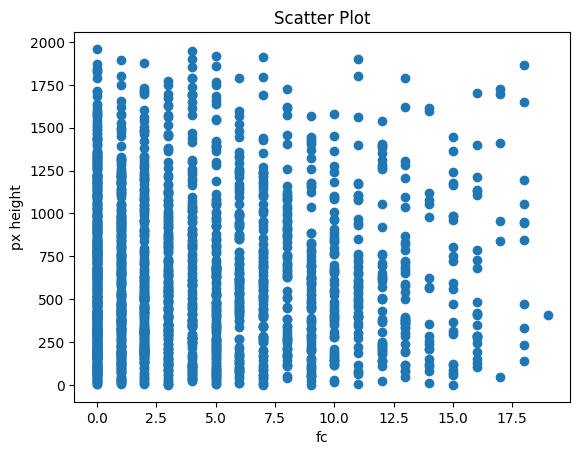

In [ ]:
plt.scatter(datatrain['fc'], datatrain['px_height'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('fc')
plt.ylabel('px height')

plt.show()

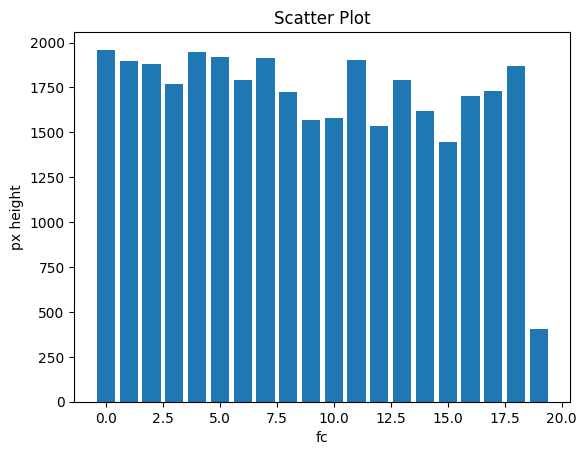

In [ ]:
plt.bar(datatrain['fc'], datatrain['px_height'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('fc')
plt.ylabel('px height')

plt.show()

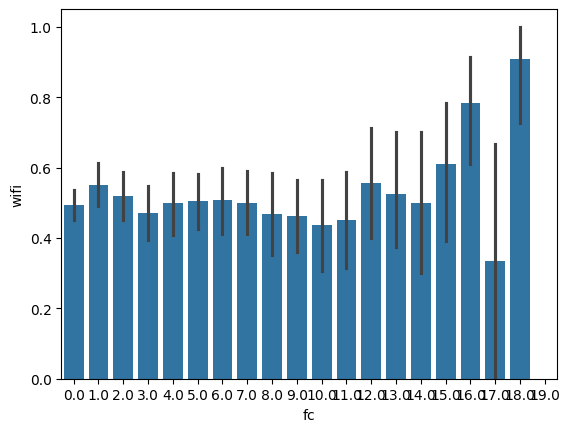

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# reading the database


sns.barplot(x=datatrain['fc'],y=datatrain['wifi'], data=datatrain)

plt.show()

In [ ]:
#def drop_outliers_IQR(datatrain):

#   q1=datatrain.quantile(0.25)

#   q3=datatrain.quantile(0.75)

#   IQR=q3-q1

#   not_outliers = datatrain[~((datatrain<(q1-1.5*IQR)) | (datatrain>(q3+1.5*IQR)))]

#   outliers_dropped = outliers.dropna().reset_index()

#   return outliers_dropped



In [ ]:
#df = drop_outliers_IQR(datatrain)



In [ ]:

# Identify the quartiles
q1, q3 = np.percentile(datatrain['fc'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = datatrain[(datatrain['fc'] >= lower_bound)
                & (datatrain['fc'] <= upper_bound)]

# Identify the quartiles
q1, q3 = np.percentile(datatrain['px_height'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = datatrain[(datatrain['px_height'] >= lower_bound)
                & (datatrain['px_height'] <= upper_bound)]
# Identify the quartiles
q1, q3 = np.percentile(datatrain['wifi'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = datatrain[(datatrain['wifi'] >= lower_bound)
                & (datatrain['wifi'] <= upper_bound)]


In [ ]:
clean_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


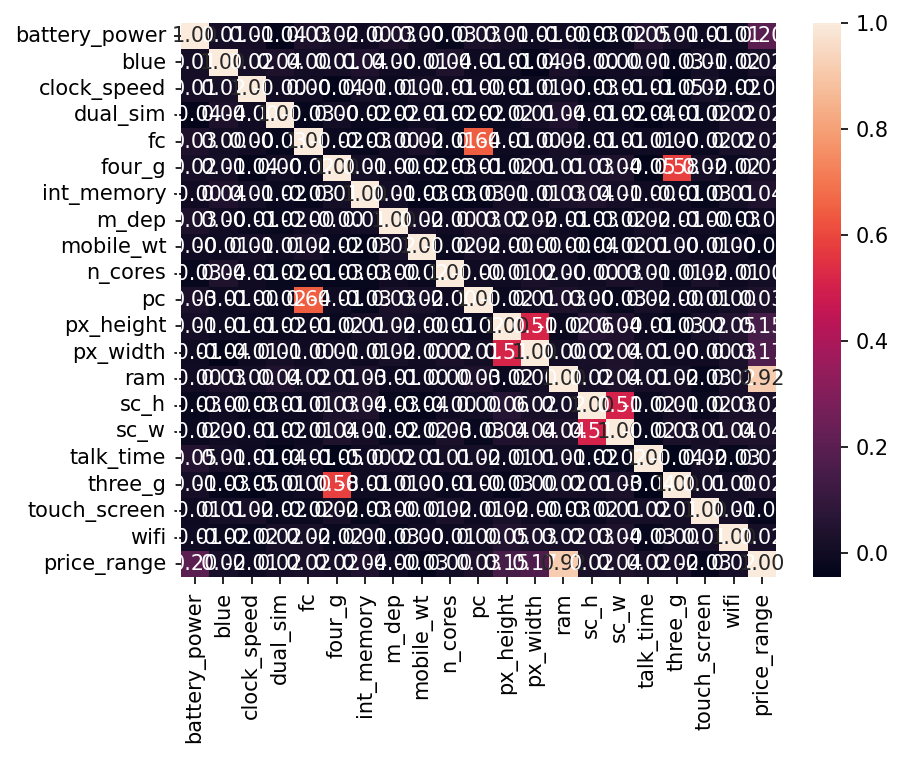

In [ ]:
#correlation
corr = datatrain.corr()

plt.figure(dpi=150)
sns.heatmap(datatrain.corr(), annot=True, fmt= '.2f')
plt.show()

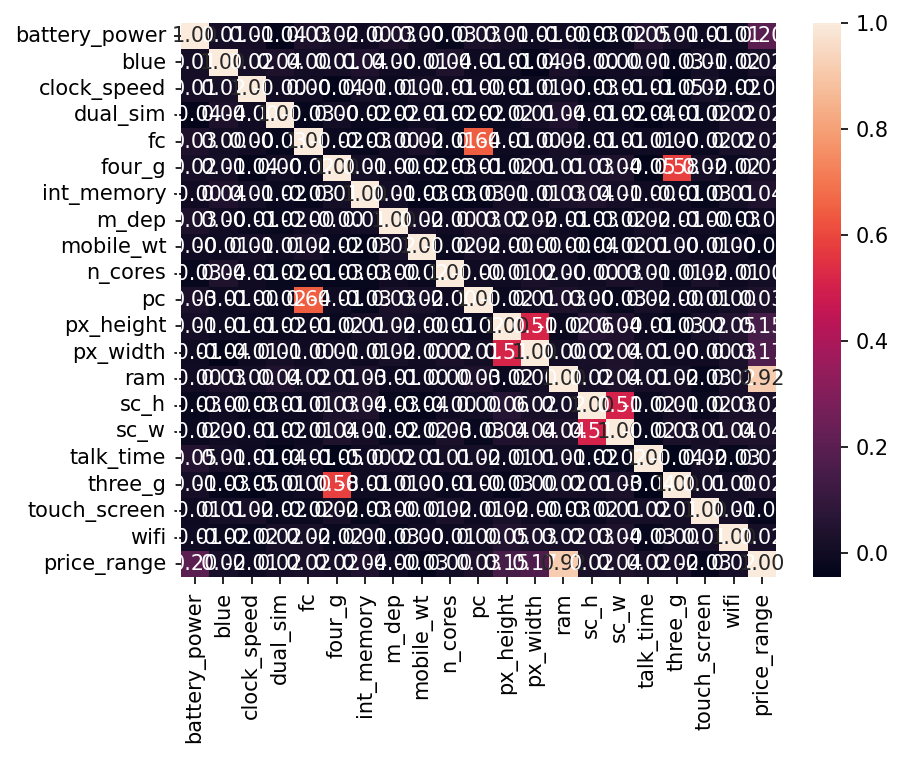

In [ ]:
#correlation
corr = clean_data.corr()

plt.figure(dpi=150)
sns.heatmap(datatrain.corr(), annot=True, fmt= '.2f')
plt.show()

some single correlation

In [ ]:
corr['battery_power'].sort_values(ascending = False)

battery_power    1.000000
price_range      0.200723
talk_time        0.052510
fc               0.033502
m_dep            0.033358
pc               0.029566
four_g           0.015028
px_height        0.012031
three_g          0.011522
clock_speed      0.011482
blue             0.011252
mobile_wt        0.000687
ram             -0.000705
int_memory      -0.004953
px_width        -0.007834
wifi            -0.008343
touch_screen    -0.010516
sc_w            -0.021289
sc_h            -0.029321
n_cores         -0.029682
dual_sim        -0.041847
Name: battery_power, dtype: float64

In [ ]:
corr['blue'].sort_values(ascending = False)

blue             1.000000
int_memory       0.041189
n_cores          0.037283
dual_sim         0.035198
ram              0.026331
clock_speed      0.021419
price_range      0.020573
talk_time        0.013934
four_g           0.013867
battery_power    0.011252
touch_screen     0.010061
fc               0.003429
m_dep            0.002318
sc_w             0.000470
sc_h            -0.003638
px_height       -0.007847
mobile_wt       -0.009117
pc              -0.011208
wifi            -0.021863
three_g         -0.030236
px_width        -0.041450
Name: blue, dtype: float64

In [ ]:
corr['dual_sim'].sort_values(ascending = False)

dual_sim         1.000000
ram              0.041136
blue             0.035198
wifi             0.022740
price_range      0.017444
px_width         0.013782
four_g           0.004643
clock_speed     -0.001315
mobile_wt       -0.008027
sc_h            -0.012622
three_g         -0.014008
int_memory      -0.015420
pc              -0.015607
sc_w            -0.016809
touch_screen    -0.017117
px_height       -0.018913
m_dep           -0.022929
n_cores         -0.023370
fc              -0.028421
talk_time       -0.039404
battery_power   -0.041847
Name: dual_sim, dtype: float64

In [ ]:
corr['fc'].sort_values(ascending = False)

fc               1.000000
pc               0.644616
battery_power    0.033502
price_range      0.024999
mobile_wt        0.024775
wifi             0.019341
ram              0.018625
blue             0.003429
clock_speed      0.002117
three_g          0.000730
m_dep           -0.001284
px_width        -0.002479
talk_time       -0.005816
px_height       -0.010650
sc_h            -0.011179
sc_w            -0.011943
n_cores         -0.014137
touch_screen    -0.015703
four_g          -0.018446
int_memory      -0.026776
dual_sim        -0.028421
Name: fc, dtype: float64

In [ ]:
corr['int_memory'].sort_values(ascending = False)

int_memory       1.000000
price_range      0.042589
blue             0.041189
sc_h             0.039175
ram              0.030731
px_height        0.012920
sc_w             0.010857
four_g           0.008239
clock_speed      0.007137
wifi             0.006930
m_dep            0.005296
talk_time       -0.003030
battery_power   -0.004953
px_width        -0.008813
three_g         -0.009535
dual_sim        -0.015420
fc              -0.026776
touch_screen    -0.027144
n_cores         -0.027821
pc              -0.032888
mobile_wt       -0.034741
Name: int_memory, dtype: float64

In [ ]:
corr['px_height'].sort_values(ascending = False)

px_height        1.000000
px_width         0.510055
price_range      0.148184
sc_h             0.059404
wifi             0.050959
sc_w             0.041226
m_dep            0.022706
touch_screen     0.020227
int_memory       0.012920
battery_power    0.012031
mobile_wt       -0.001295
blue            -0.007847
n_cores         -0.008191
fc              -0.010650
talk_time       -0.012949
clock_speed     -0.014395
four_g          -0.016040
pc              -0.018858
dual_sim        -0.018913
ram             -0.019390
three_g         -0.031821
Name: px_height, dtype: float64

In [ ]:
corr['ram'].sort_values(ascending = False)

ram              1.000000
price_range      0.917119
dual_sim         0.041136
sc_w             0.035546
pc               0.031578
int_memory       0.030731
blue             0.026331
wifi             0.022725
fc               0.018625
sc_h             0.015956
three_g          0.015823
talk_time        0.010824
four_g           0.007994
n_cores          0.004815
px_width         0.004134
clock_speed      0.003509
battery_power   -0.000705
mobile_wt       -0.004486
m_dep           -0.009816
px_height       -0.019390
touch_screen    -0.030437
Name: ram, dtype: float64

In [ ]:
corr['talk_time'].sort_values(ascending = False)

talk_time        1.000000
battery_power    0.052510
price_range      0.021859
m_dep            0.018093
touch_screen     0.017196
pc               0.015183
blue             0.013934
n_cores          0.012215
ram              0.010824
px_width         0.007007
mobile_wt        0.005279
int_memory      -0.003030
fc              -0.005816
clock_speed     -0.011432
px_height       -0.012949
sc_h            -0.016238
sc_w            -0.022603
wifi            -0.029504
dual_sim        -0.039404
three_g         -0.042688
four_g          -0.046475
Name: talk_time, dtype: float64

In [ ]:
corr['wifi'].sort_values(ascending = False)

wifi             1.000000
px_height        0.050959
sc_w             0.035292
px_width         0.029818
sc_h             0.025280
dual_sim         0.022740
ram              0.022725
fc               0.019341
price_range      0.018785
touch_screen     0.011917
int_memory       0.006930
three_g          0.004316
pc               0.003650
mobile_wt        0.001715
battery_power   -0.008343
n_cores         -0.010393
four_g          -0.019099
blue            -0.021863
clock_speed     -0.024471
m_dep           -0.026687
talk_time       -0.029504
Name: wifi, dtype: float64

In [ ]:
corr['touch_screen'].sort_values(ascending = False)

touch_screen     1.000000
n_cores          0.023387
px_height        0.020227
clock_speed      0.019756
talk_time        0.017196
four_g           0.015361
three_g          0.013917
sc_w             0.012866
wifi             0.011917
blue             0.010061
m_dep           -0.000904
px_width        -0.001742
battery_power   -0.010516
pc              -0.010530
mobile_wt       -0.012274
fc              -0.015703
dual_sim        -0.017117
sc_h            -0.019356
int_memory      -0.027144
price_range     -0.030411
ram             -0.030437
Name: touch_screen, dtype: float64

In [ ]:
sns.pairplot(datatrain)

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-77-be7eae7c3fb6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datatrain['price_range'])


<Axes: xlabel='price_range', ylabel='Density'>

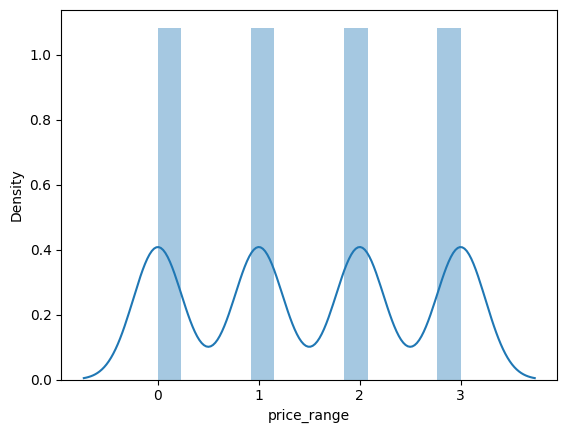

In [ ]:
sns.distplot(datatrain['price_range'])

In [ ]:
#feature selection for train test split
x = datatrain.drop('price_range', axis = 1)
y = datatrain['price_range']

In [ ]:
#determine the prices from 0 to 3
y.unique()

array([1, 2, 3, 0])

In [ ]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = datatrain['price_range'].value_counts().values


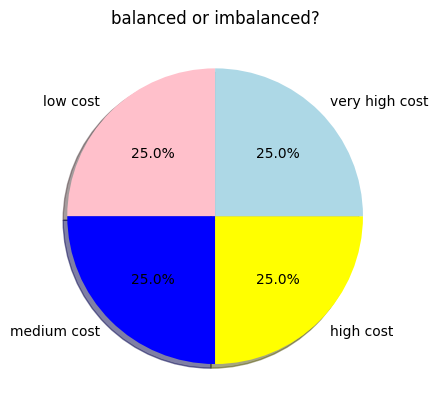

In [ ]:
colors = ['pink','blue','yellow', 'lightblue']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show()

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)

In [ ]:
# check if the split works correctly
print(x_train.shape)
print(x_valid.shape)

(1600, 20)
(400, 20)


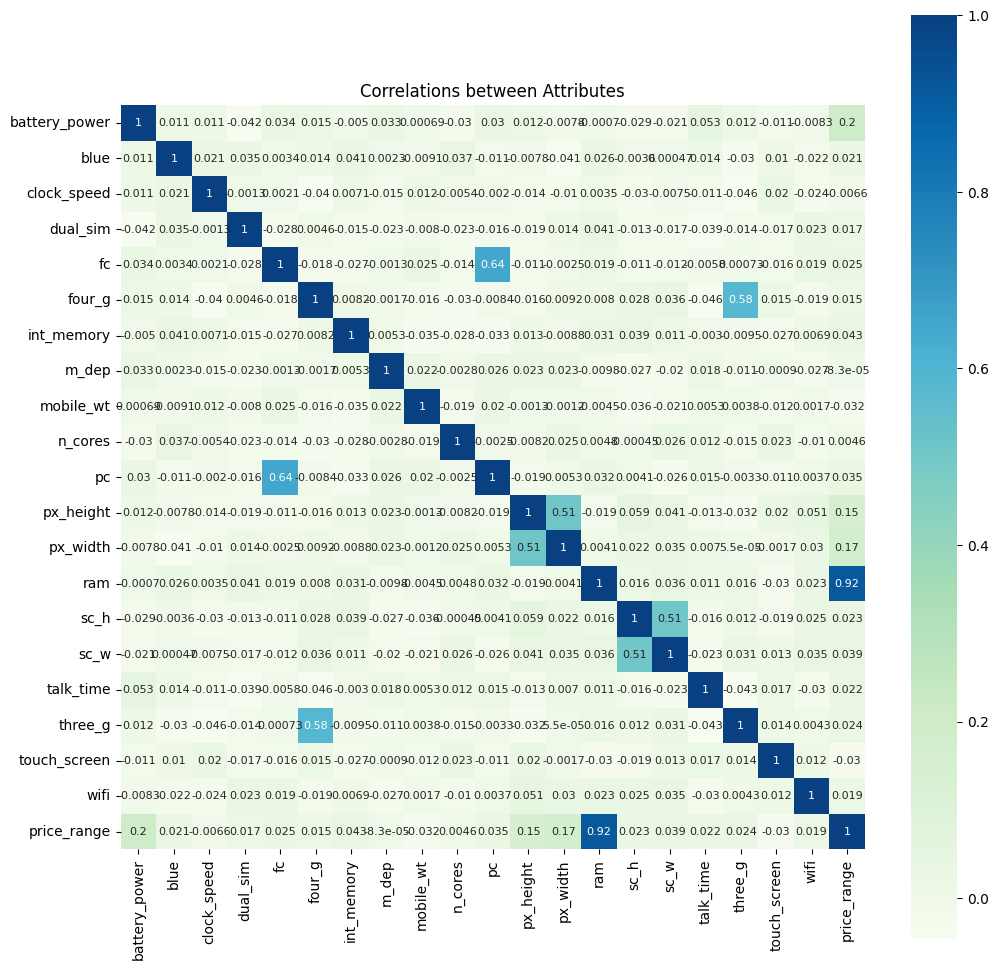

In [ ]:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(datatrain.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between features')
plt.show ()

 ram is the highest correlation to price range



In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
x_train


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1569,1494,0,2.4,0,6.0,1.0,3.0,0.9,93.0,7.0,17.0,944.0,1003.0,1208.0,14.0,13.0,17,1,1,0
1668,962,0,1.0,1,14.0,0.0,2.0,0.9,125.0,1.0,20.0,1618.0,1916.0,1491.0,16.0,2.0,14,1,0,0
1989,586,0,2.8,0,2.0,0.0,15.0,0.2,83.0,3.0,11.0,241.0,854.0,2592.0,12.0,8.0,3,0,0,0
1609,1148,0,2.3,1,0.0,1.0,58.0,0.3,170.0,5.0,20.0,606.0,688.0,3127.0,10.0,7.0,11,1,0,0
1424,1352,0,2.4,0,5.0,1.0,6.0,0.9,92.0,6.0,9.0,629.0,1299.0,1309.0,12.0,1.0,14,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1777,1,3.0,0,3.0,0.0,20.0,0.6,188.0,6.0,5.0,511.0,616.0,3868.0,5.0,1.0,7,0,1,1
1598,1851,0,2.9,0,0.0,0.0,53.0,0.7,112.0,6.0,2.0,174.0,1175.0,2678.0,6.0,0.0,8,1,0,0
1775,574,1,3.0,0,1.0,1.0,30.0,0.9,126.0,2.0,3.0,94.0,1334.0,1167.0,5.0,3.0,19,1,0,0
258,564,0,1.8,1,0.0,1.0,51.0,0.5,168.0,3.0,1.0,912.0,1980.0,1074.0,14.0,8.0,15,1,1,0


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

# Impute missing values in X_train
x_train_imputed = imputer.fit_transform(x_train)
x_valid_imputed= imputer.fit_transform(x_valid)




In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train_imputed, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = model_knn.predict(x_valid_imputed)

In [ ]:
print(metrics.confusion_matrix(y_valid, y_pred_knn))

[[94  6  0  0]
 [ 3 96  1  0]
 [ 0  3 92  5]
 [ 0  0  7 93]]


In [ ]:
print(accuracy_score(y_valid, y_pred_knn))

0.9375


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(x_train_imputed, y_train)
model.best_params_

{'n_neighbors': 15}

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=9)
model_knn.fit(x_train_imputed, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred_knn = model_knn.predict(x_valid_imputed)
print(metrics.confusion_matrix(y_valid, y_pred_knn))

[[95  5  0  0]
 [ 2 96  2  0]
 [ 0  3 94  3]
 [ 0  0  6 94]]


In [ ]:
acc_knn = accuracy_score(y_valid, y_pred_knn)
acc_knn

0.9475

test data

In [ ]:
# We did not have 'id' column in the traning and validation datasets, so, we delete it from test dataset to make the dimension of input dataset same.
datatest=datatest.drop('id',axis=1)

In [ ]:
pred_price_range = model_knn.predict(datatest)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
pred_price_range

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [ ]:
datatest['price_range'] = pred_price_range

In [ ]:
datatest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [ ]:
pred_price_range

Normalization

MinMaxScaler scales the data so that each feature is in the range [0, 1].
It works well when the features have different scales and the algorithm being used is sensitive to the scale of the features, such as k-nearest neighbors or neural networks.
Rescale your data using scikit-learn using the MinMaxScaler.

In [ ]:
#Normalization
# initialising the MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))

# learning the statistical parameters for each of the data and transforming
#rescaledX = scaler.fit_transform(clean_data)
#rescaledX[:]

In [ ]:
X = clean_data.drop('price_range', axis=1)
y = clean_data['price_range']

In [ ]:
# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Standardization
Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.
We can standardize data using scikit-learn with the StandardScaler class.
It works well when the features have a normal distribution or when the algorithm being used is not sensitive to the scale of the features

In [ ]:
#Standardscaling
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(datatrain)
#rescaledata = scaler.transform(datatrain)
#rescaledata[:]

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.00601811,
         0.98609664, -0.4472136 ],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.99401789,
        -1.01409939,  0.4472136 ],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.99401789,
        -1.01409939,  0.4472136 ],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.99401789,
        -1.01409939,  1.34164079],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.99401789,
         0.98609664, -1.34164079],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.99401789,
         0.98609664,  1.34164079]])